<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/v1/states/daily.json"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')

dfCovidtracking.date = dfCovidtracking.date.transform(lambda x: pd.to_datetime(datetime.date(x//10000, x%10000//100, x%100
                                          )))
dfCovidtracking.set_index(['date'], inplace=True)


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/06-05-2020.csv"


dfJHUData = pd.read_csv(jhurl, header=0, usecols=[0,1,2,3,4,5,6,7,8,9,10,11],
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [6]:
print("US Summary")
dfCovidtracking.groupby(by='date').sum()[-3:][['positive', 'death', 'positiveIncrease', 'deathIncrease']]

US Summary


,positive,death,positiveIncrease,deathIncrease
date,,,,
2020-06-04,1864112,102101,20797,884
2020-06-05,1892727,103201,28615,1100
2020-06-06,1916053,103947,23326,746


In [7]:
dfCovidtracking.loc[dfCovidtracking.state=='CA'].groupby(by='date').sum()[['positive', 'death', 'positiveIncrease', 'deathIncrease']].tail()

,positive,death,positiveIncrease,deathIncrease
date,,,,
2020-06-02,115310,4286,2304,35
2020-06-03,117687,4361,2377,75
2020-06-04,119807,4422,2120,61
2020-06-05,122901,4485,3094,63
2020-06-06,126016,4559,3115,74


In [8]:
dfctd_state_curr = dfCovidtracking.loc[dfCovidtracking.index.max()] \
  .rename(columns={'positive':'total_positive'}) \
  .set_index('state') 

print(f"Total positive cases = {dfctd_state_curr.total_positive.sum()}")
print(f"Total deaths = {dfctd_state_curr.death.sum()}")
  
dfctd_state_curr.sort_values(by='total_positive', ascending=False).head(5)

Total positive cases = 1916053
Total deaths = 103947


,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NY,377316,2060091,0,2603.0,89995.0,720.0,0.0,554.0,0.0,67261.0,A,6/6/2020 00:00,2020-06-06T00:00:00Z,06/05 20:00,24212,89995.0,2020-06-06T00:00:00Z,36,1108,76787,2437407,2437407,77895,2437407,37,0,61ec66d8c62faf19241c696b861fb72dec69377b,0,0,0,0,0,
NJ,163893,755555,0,1933.0,18023.0,539.0,0.0,410.0,0.0,27641.0,A+,6/6/2020 13:00,2020-06-06T13:00:00Z,06/06 09:00,12106,18023.0,2020-06-06T13:00:00Z,34,557,0,919448,919448,557,919448,57,143,85f927cc691c6e94119f38be86be893066b281bc,0,0,0,0,0,
IL,126890,895184,0,2702.0,0.0,770.0,0.0,476.0,0.0,0.0,A,6/6/2020 00:00,2020-06-06T00:00:00Z,06/05 20:00,5864,0.0,2020-06-06T00:00:00Z,17,975,20180,1022074,1022074,21155,1022074,69,0,7a0f0d3fe8a92d3782abf001cc93abbfe76ee4f7,0,0,0,0,0,
CA,126016,2182284,0,4526.0,0.0,1315.0,0.0,0.0,0.0,0.0,B,6/6/2020 00:00,2020-06-06T00:00:00Z,06/05 20:00,4559,0.0,2020-06-06T00:00:00Z,06,3115,66722,2308300,2308300,69837,2308300,74,0,9dd80e35a7f1f942986d348c90755639da5c1ec4,0,0,0,0,0,
MA,103132,541507,0,1529.0,10369.0,359.0,0.0,238.0,0.0,0.0,A+,6/6/2020 10:00,2020-06-06T10:00:00Z,06/06 06:00,7289,10369.0,2020-06-06T10:00:00Z,25,575,9295,644639,644639,9870,644639,54,66,a3bd62e9ab388053f75d147e1519f2e7f0871716,0,0,0,0,0,


In [0]:
curr_state = 'CA'
gbUSA = dfCovidtracking.groupby(['date'])
gbState = dfCovidtracking[dfCovidtracking.state==curr_state].groupby(['date'])

cols = ['positive', 'totalTestResults', 'death', 'positiveIncrease','deathIncrease']

dfUSAPos = gbUSA[cols].sum().reset_index().copy()
dfStatePos = gbState[cols].sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 

dfUSAPos['pos_pct']= dfUSAPos.positive/dfctd_state_curr.total_positive.sum()
dfStatePos['pos_pct']=dfStatePos.positive/dfctd_state_curr.loc[curr_state].total_positive

In [10]:
dfUSAPos[-7:]


,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
130,2020-05-31,1783570,16936891,98600,22545,667,0.930856
131,2020-06-01,1799761,17340682,99078,16191,478,0.939306
132,2020-06-02,1823269,17757838,100246,23508,1168,0.951575
133,2020-06-03,1843315,18214950,101217,20046,971,0.962038
134,2020-06-04,1864112,18680529,102101,20797,884,0.972892
135,2020-06-05,1892727,19231444,103201,28615,1100,0.987826
136,2020-06-06,1916053,19778873,103947,23326,746,1.000000


In [11]:
dfStatePos[-7:]

,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
88,2020-05-31,110583,1944848,4213,3705,57,0.877531
89,2020-06-01,113006,2012583,4251,2423,38,0.896759
90,2020-06-02,115310,2071591,4286,2304,35,0.915043
91,2020-06-03,117687,2131294,4361,2377,75,0.933905
92,2020-06-04,119807,2182671,4422,2120,61,0.950728
93,2020-06-05,122901,2238463,4485,3094,63,0.975281
94,2020-06-06,126016,2308300,4559,3115,74,1.000000


In [12]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score
date,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-02,1823269,15934569,4054,32728.0,214382.0,7403.0,8566.0,3852.0,710.0,463868.0,100246,214382.0,23508,393648,17761892,17757838,417156,17757838,1168,1678,0,0,0,0,0
2020-06-03,1843315,16371635,3556,32081.0,216640.0,7224.0,8688.0,3749.0,717.0,479258.0,101217,216640.0,20046,437066,18218506,18214950,457112,18214950,971,2258,0,0,0,0,0
2020-06-04,1864112,16816417,3474,31659.0,213812.0,7054.0,8787.0,3665.0,723.0,485002.0,102101,213812.0,20797,444782,18684003,18680529,465579,18680529,884,-2828,0,0,0,0,0
2020-06-05,1892727,17338717,1749,31335.0,215252.0,6912.0,8863.0,3523.0,740.0,491706.0,103201,215252.0,28615,522300,19233193,19231444,550915,19231444,1100,1440,0,0,0,0,0
2020-06-06,1916053,17862820,1796,30909.0,216259.0,6754.0,8920.0,3476.0,750.0,500849.0,103947,216259.0,23326,524103,19780669,19778873,547429,19778873,746,1007,0,0,0,0,0


In [13]:
gbState.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score
date,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-02,115310,1956281,0,4393.0,0.0,1286.0,0.0,0.0,0.0,0.0,4286,0.0,2304,56704,2071591,2071591,59008,2071591,35,0,0,0,0,0,0
2020-06-03,117687,2013607,0,4458.0,0.0,1313.0,0.0,0.0,0.0,0.0,4361,0.0,2377,57326,2131294,2131294,59703,2131294,75,0,0,0,0,0,0
2020-06-04,119807,2062864,0,4455.0,0.0,1279.0,0.0,0.0,0.0,0.0,4422,0.0,2120,49257,2182671,2182671,51377,2182671,61,0,0,0,0,0,0
2020-06-05,122901,2115562,0,4625.0,0.0,1333.0,0.0,0.0,0.0,0.0,4485,0.0,3094,52698,2238463,2238463,55792,2238463,63,0,0,0,0,0,0
2020-06-06,126016,2182284,0,4526.0,0.0,1315.0,0.0,0.0,0.0,0.0,4559,0.0,3115,66722,2308300,2308300,69837,2308300,74,0,0,0,0,0,0


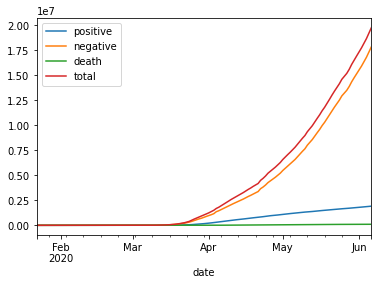

In [14]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

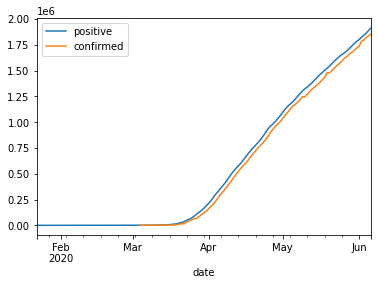

In [15]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

# John Hopkins Data


In [16]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    1897380
dead          109132
dtype: int64

In [17]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    125738
dead           4529
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [19]:
dfJHUData.head()

,FIPS,city,state,country,last_update,lat,lon,confirmed,dead,recovered,active,key
0,45001.0,Abbeville,South Carolina,US,2020-06-06 02:33:00,34.223334,-82.461707,47,0,0,47,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-06-06 02:33:00,30.295065,-92.414197,467,26,0,441,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-06-06 02:33:00,37.767072,-75.632346,969,12,0,957,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-06-06 02:33:00,43.452658,-116.241552,833,22,0,811,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-06-06 02:33:00,41.330756,-94.471059,9,0,0,9,"Adair, Iowa, US"


In [20]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                1897380
Brazil             645771
Russia             449256
United Kingdom     284734
Spain              240978
India              236184
Italy              234531
France             190180
Peru               187400
Germany            184924
Name: confirmed, dtype: int64

In [21]:
dfctd_state_curr.head()

,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,536,63365,0,7.0,48.0,0.0,0.0,1.0,0.0,382.0,A,6/6/2020 00:00,2020-06-06T00:00:00Z,06/05 20:00,10,48.0,2020-06-06T00:00:00Z,02,12,2899,63901,63901,2911,63901,0,48,9d20d6fc8bb22512521adcce05cc466f173defc7,0,0,0,0,0,
AL,20043,225601,0,0.0,1993.0,0.0,612.0,0.0,363.0,11395.0,B,6/6/2020 11:00,2020-06-06T11:00:00Z,06/06 07:00,689,1993.0,2020-06-06T11:00:00Z,01,656,5515,245644,245644,6171,245644,13,44,b359b571ad9d06da579683eab82bf2a34b322ecf,0,0,0,0,0,
AR,9101,147656,0,154.0,838.0,0.0,0.0,36.0,142.0,6266.0,A,6/6/2020 15:00,2020-06-06T15:00:00Z,06/06 11:00,154,838.0,2020-06-06T15:00:00Z,05,450,8696,156757,156757,9146,156757,2,46,f590d3252ee6e4f000a69c95eff0aa08d0b72a6f,0,0,0,0,0,
AS,0,174,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,6/1/2020 00:00,2020-06-01T00:00:00Z,05/31 20:00,0,0.0,2020-06-01T00:00:00Z,60,0,0,174,174,0,174,0,0,279989d19417173a18704a01b97b227368cb6fb8,0,0,0,0,0,
AZ,25451,246195,0,1278.0,3320.0,391.0,0.0,292.0,0.0,5399.0,A+,6/6/2020 00:00,2020-06-06T00:00:00Z,06/05 20:00,1042,3320.0,2020-06-06T00:00:00Z,04,1119,6662,271646,271646,7781,271646,30,55,8095c21e2390ef513a8391e44ebe1314c265c6d2,0,0,0,0,0,


In [0]:
dfState = dfCovidtracking.reset_index()[['date','state','positive', 'death']].set_index('state') \
  .join(dfctd_state_curr.total_positive)

In [0]:
dfState['pct']=dfState.positive/dfState.total_positive

In [24]:
dfState.loc['FL'].head(7)

,date,positive,death,total_positive,pct
state,,,,,
FL,2020-06-06,62758,2773,62758,1.000000
FL,2020-06-05,61488,2745,62758,0.979764
FL,2020-06-04,60183,2691,62758,0.958969
FL,2020-06-03,58764,2650,62758,0.936359
FL,2020-06-02,57447,2613,62758,0.915373
FL,2020-06-01,56830,2543,62758,0.905542
FL,2020-05-31,56163,2534,62758,0.894914


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

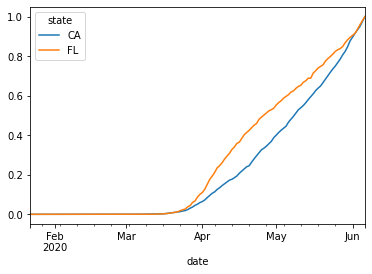

In [26]:
x = res.loc[:, ['CA','FL']].plot.line()

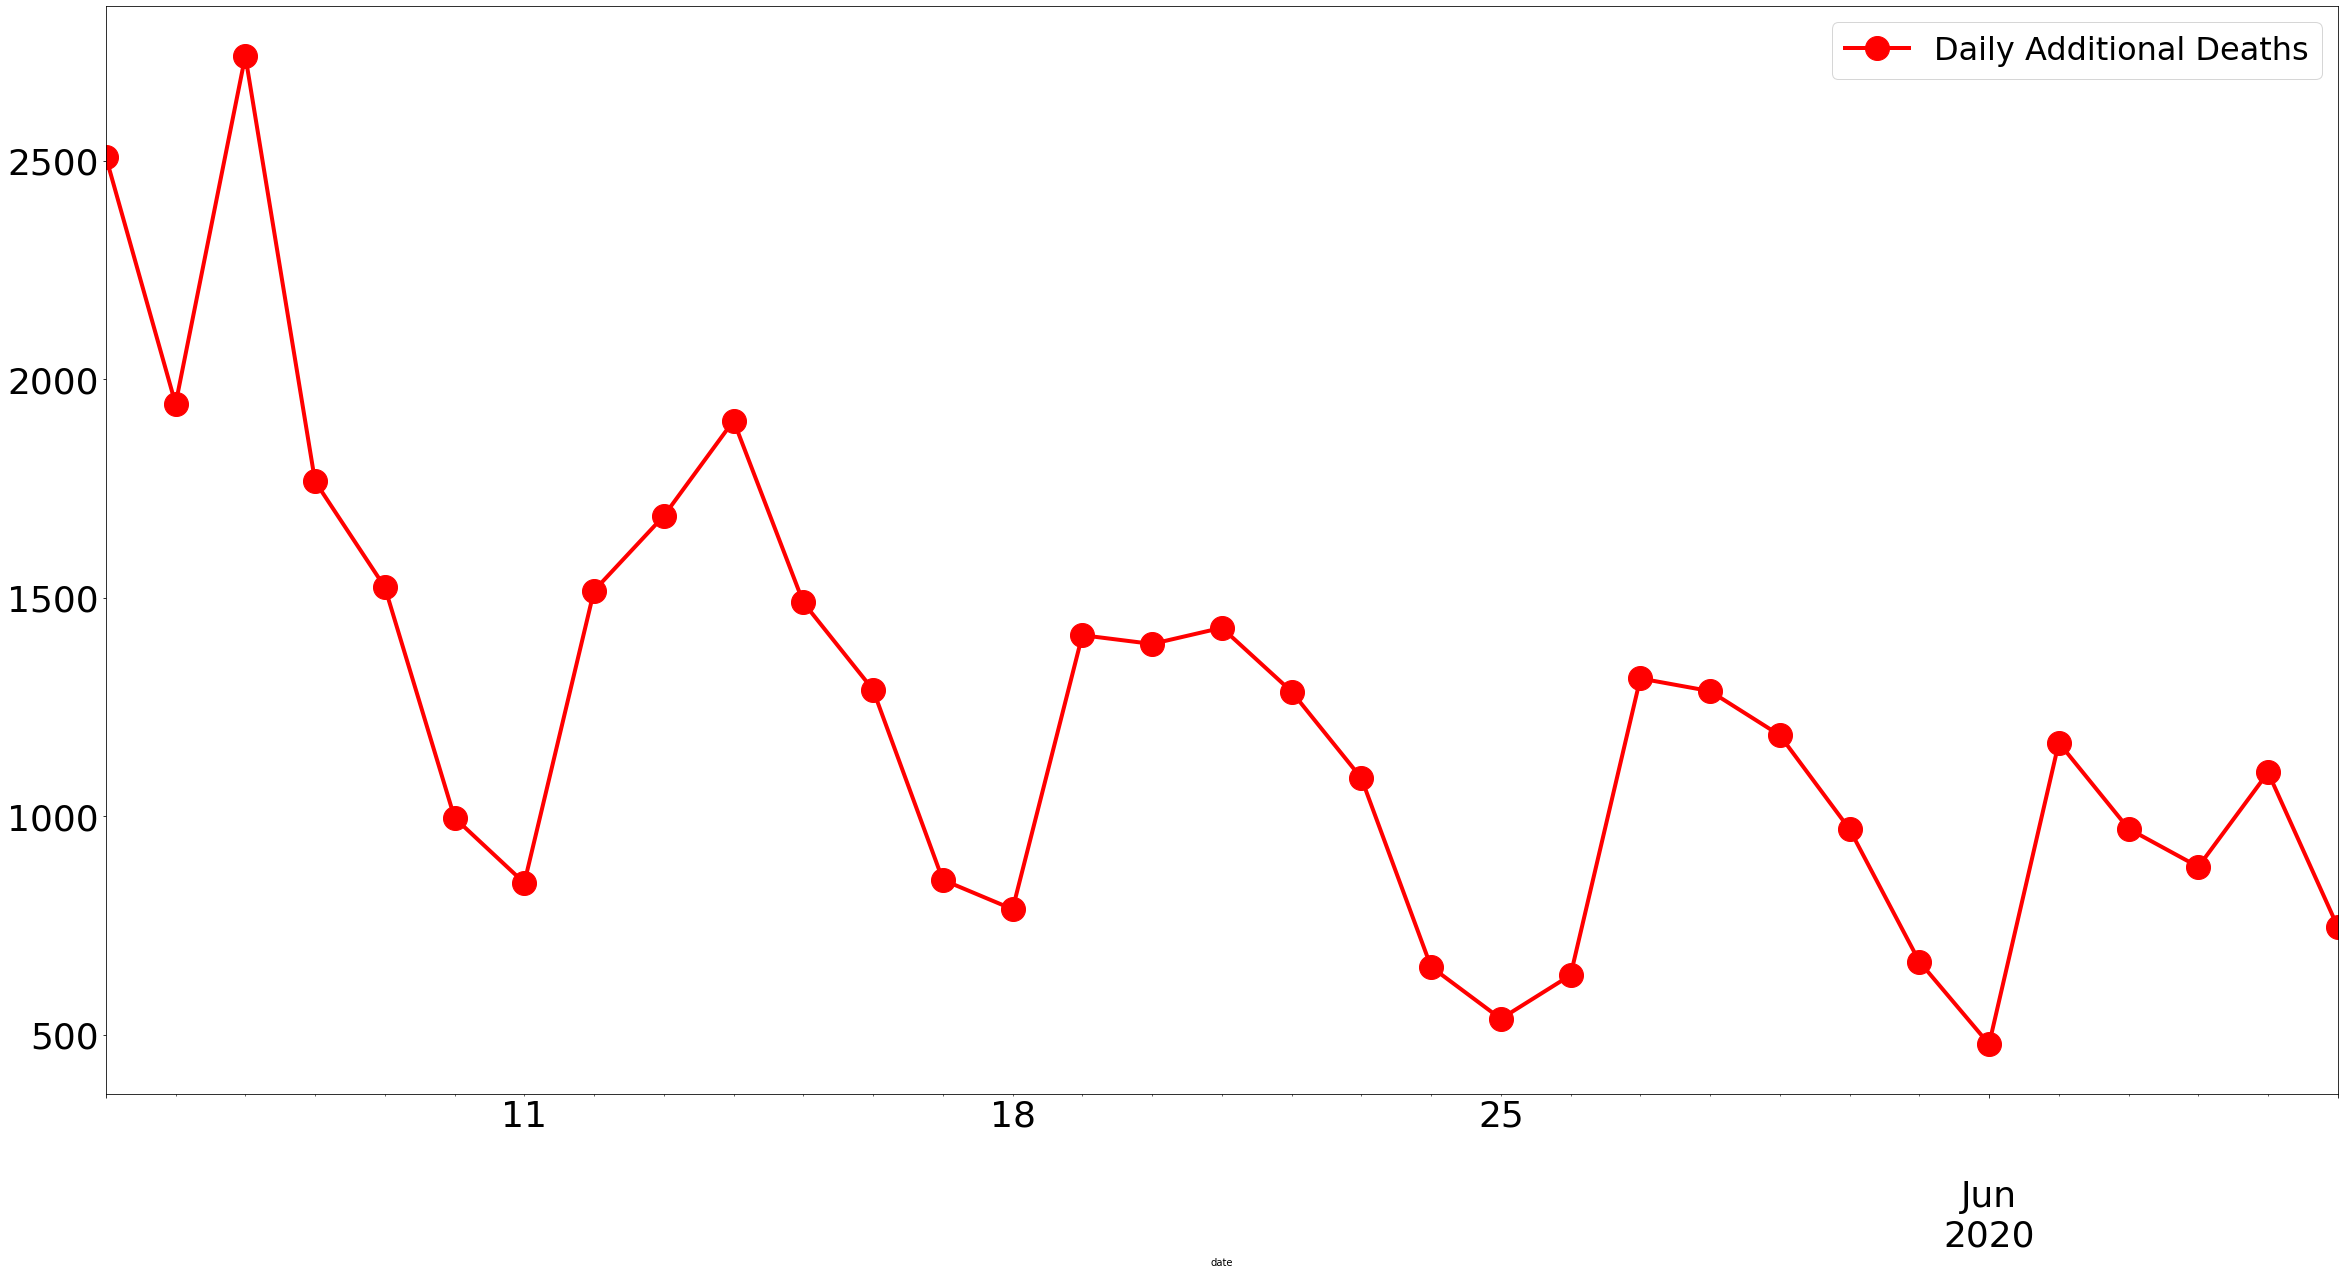

In [27]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:].deathIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Deaths'],fontsize=32)


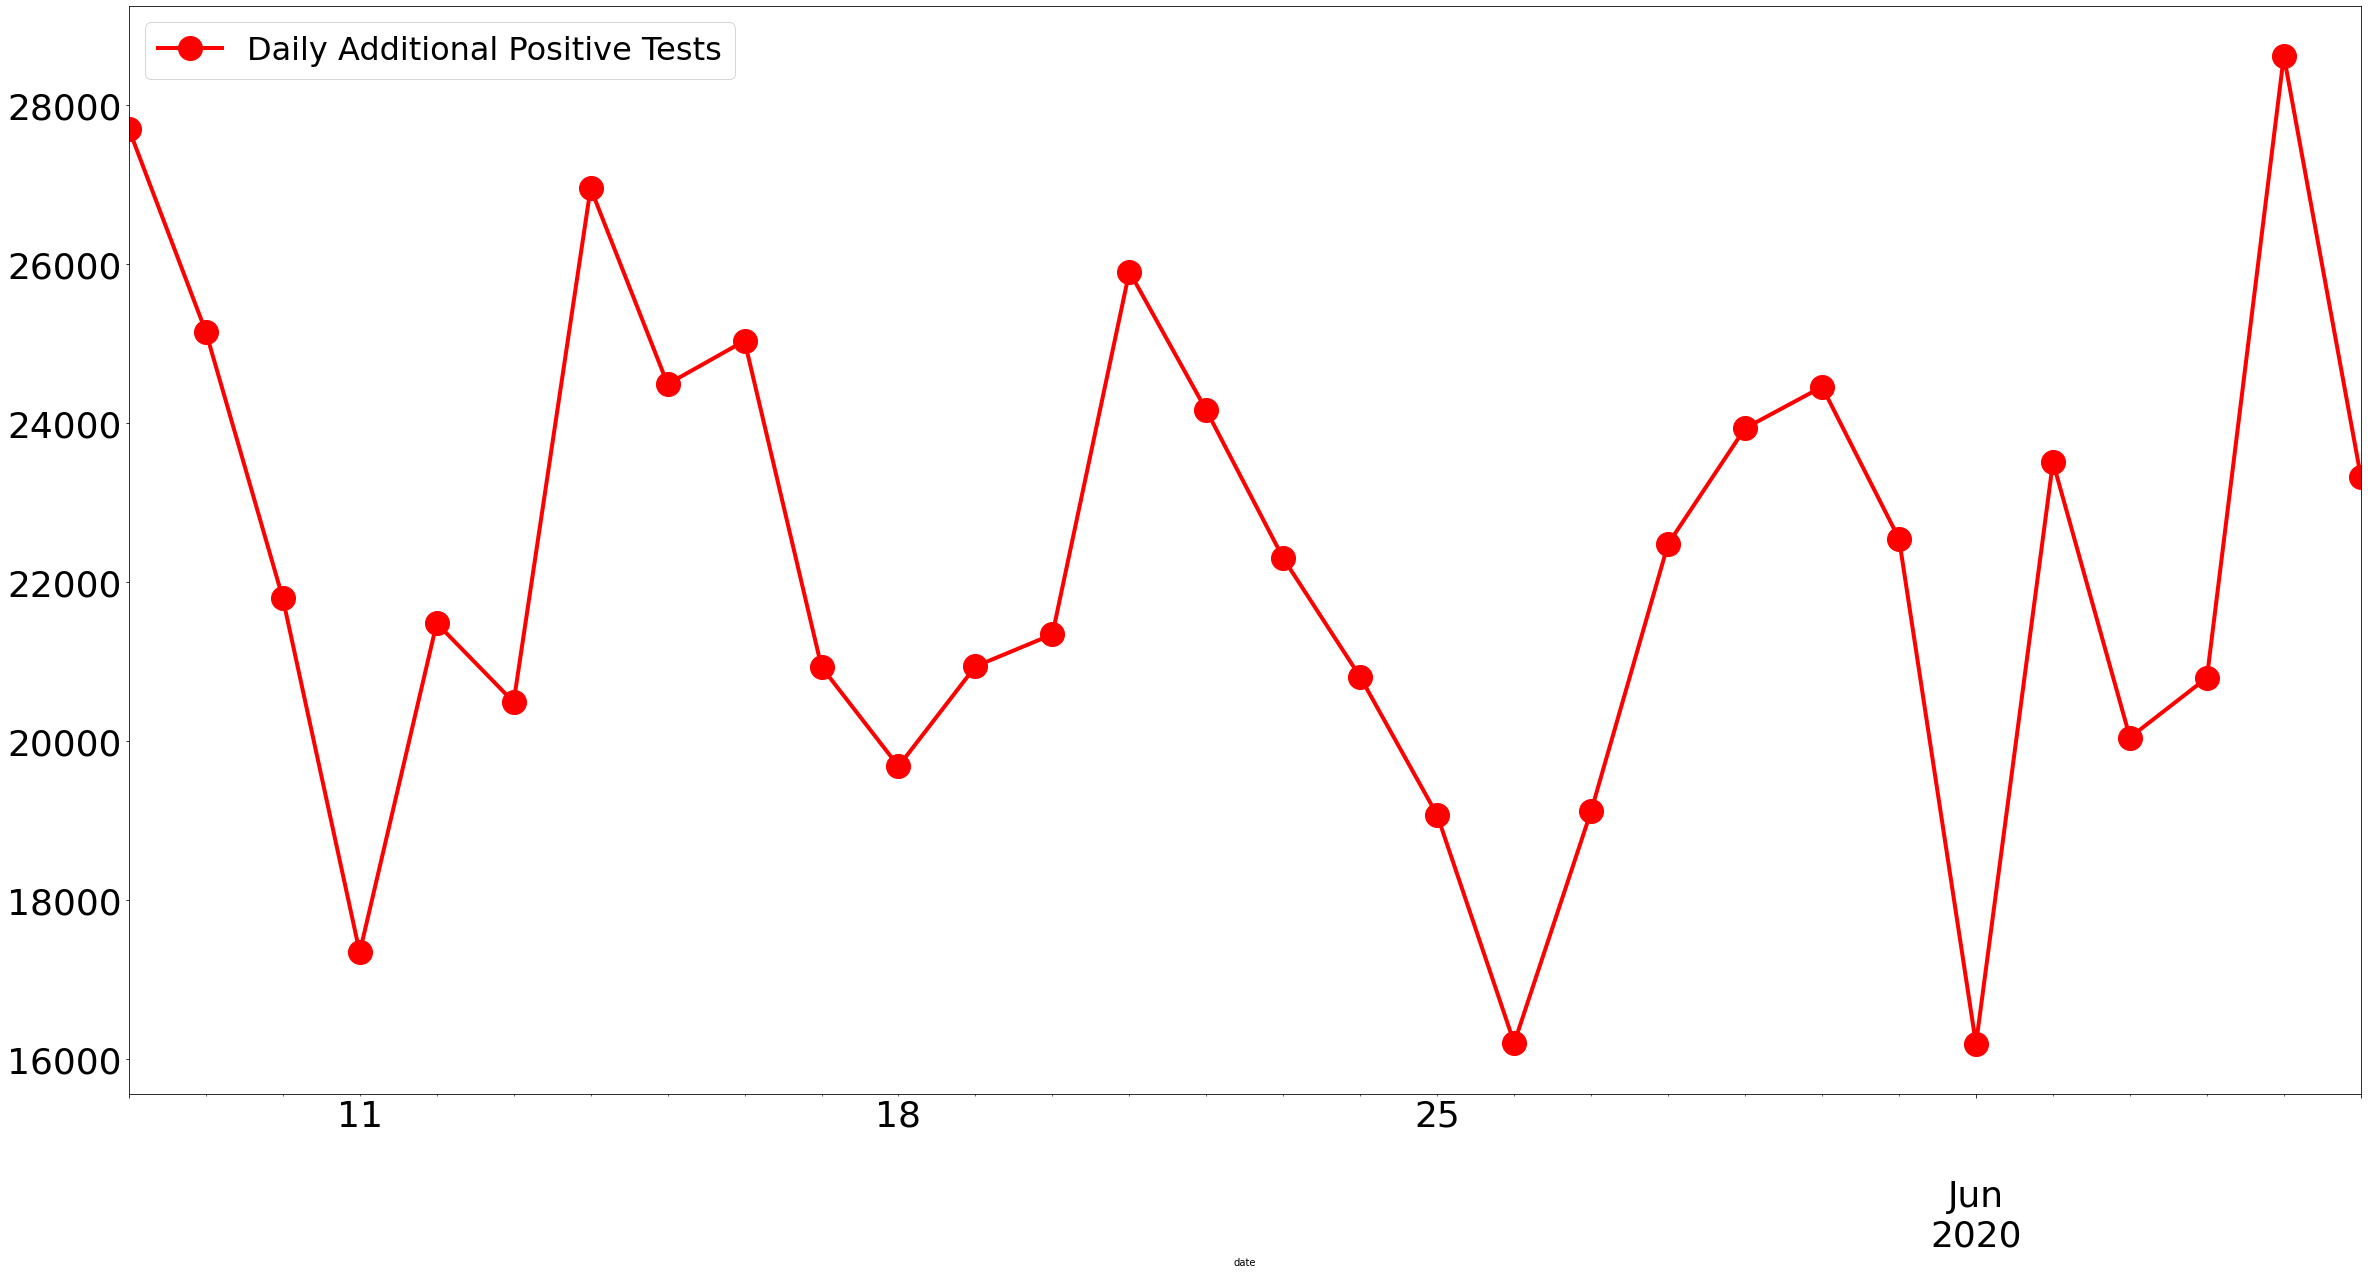

In [28]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()

chart = y1[-30:].positiveIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Positive Tests'],fontsize=32)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfByWeekYear = dfCovidtracking[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=getWeek)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfDoW = dfCovidtracking[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=lambda x: x.dayofweek)


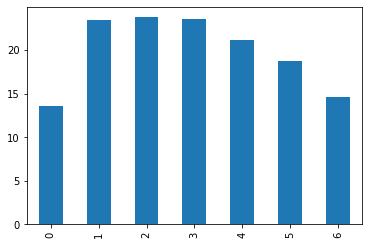

In [31]:
dfDoW.mean().deathIncrease.plot.bar()



In [32]:
dfByWeekYear.sum()[-7:]

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
202017,12877,18476,1319356,209064,1528420
202018,12704,24581,1462961,191865,1654826
202019,12406,18998,1738094,171010,1909104
202020,9587,12129,2324282,156723,2481005
202021,8053,15648,2548088,155132,2703220
202022,6595,26480,2625387,147810,2773197
202023,5347,6176,2709499,132483,2841982


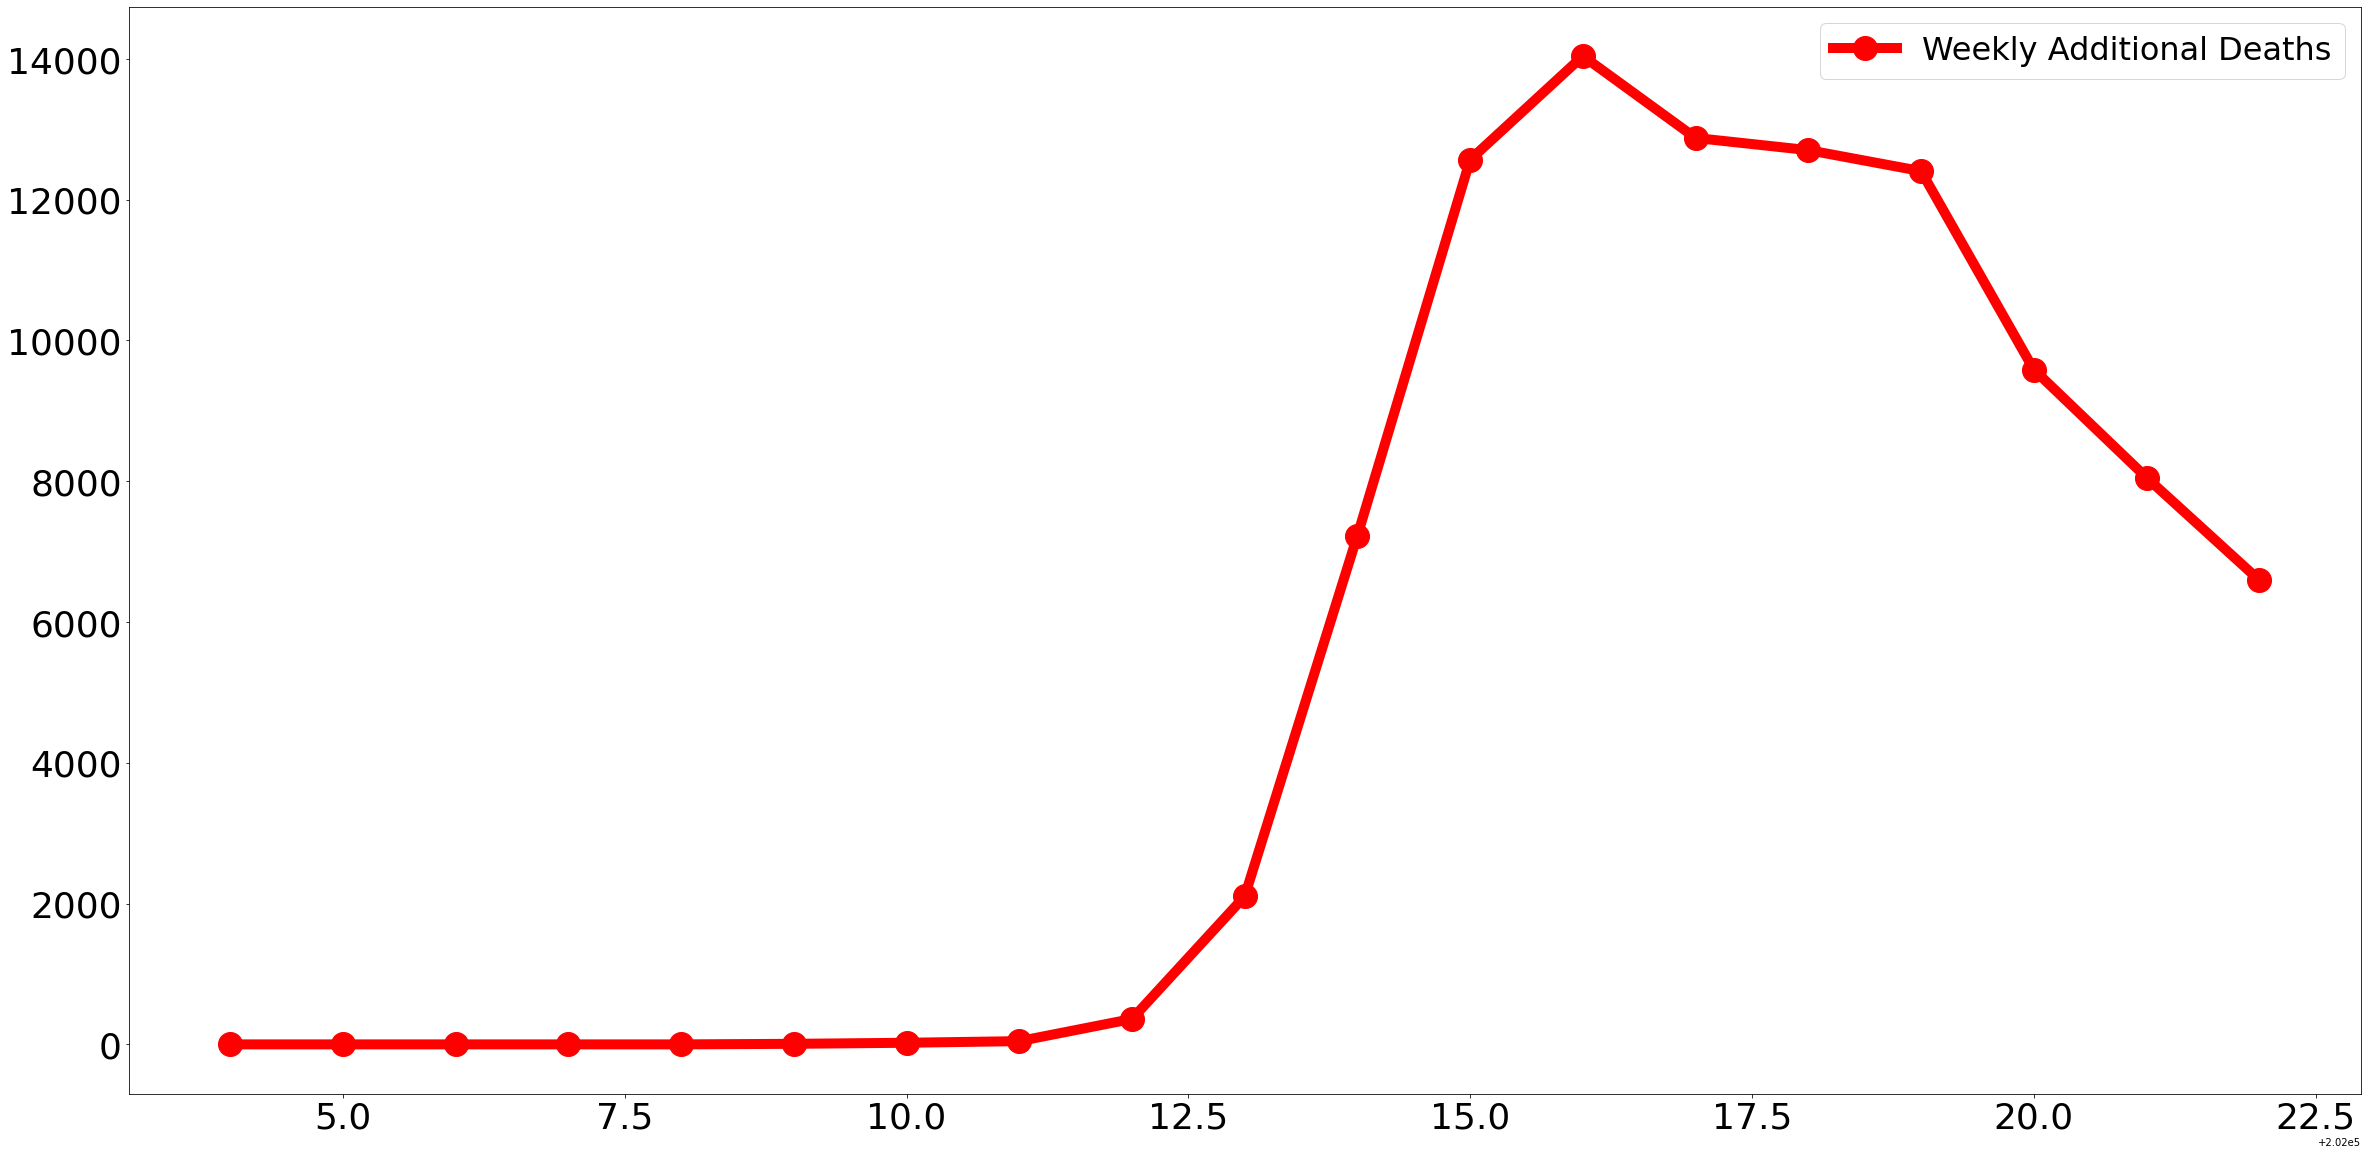

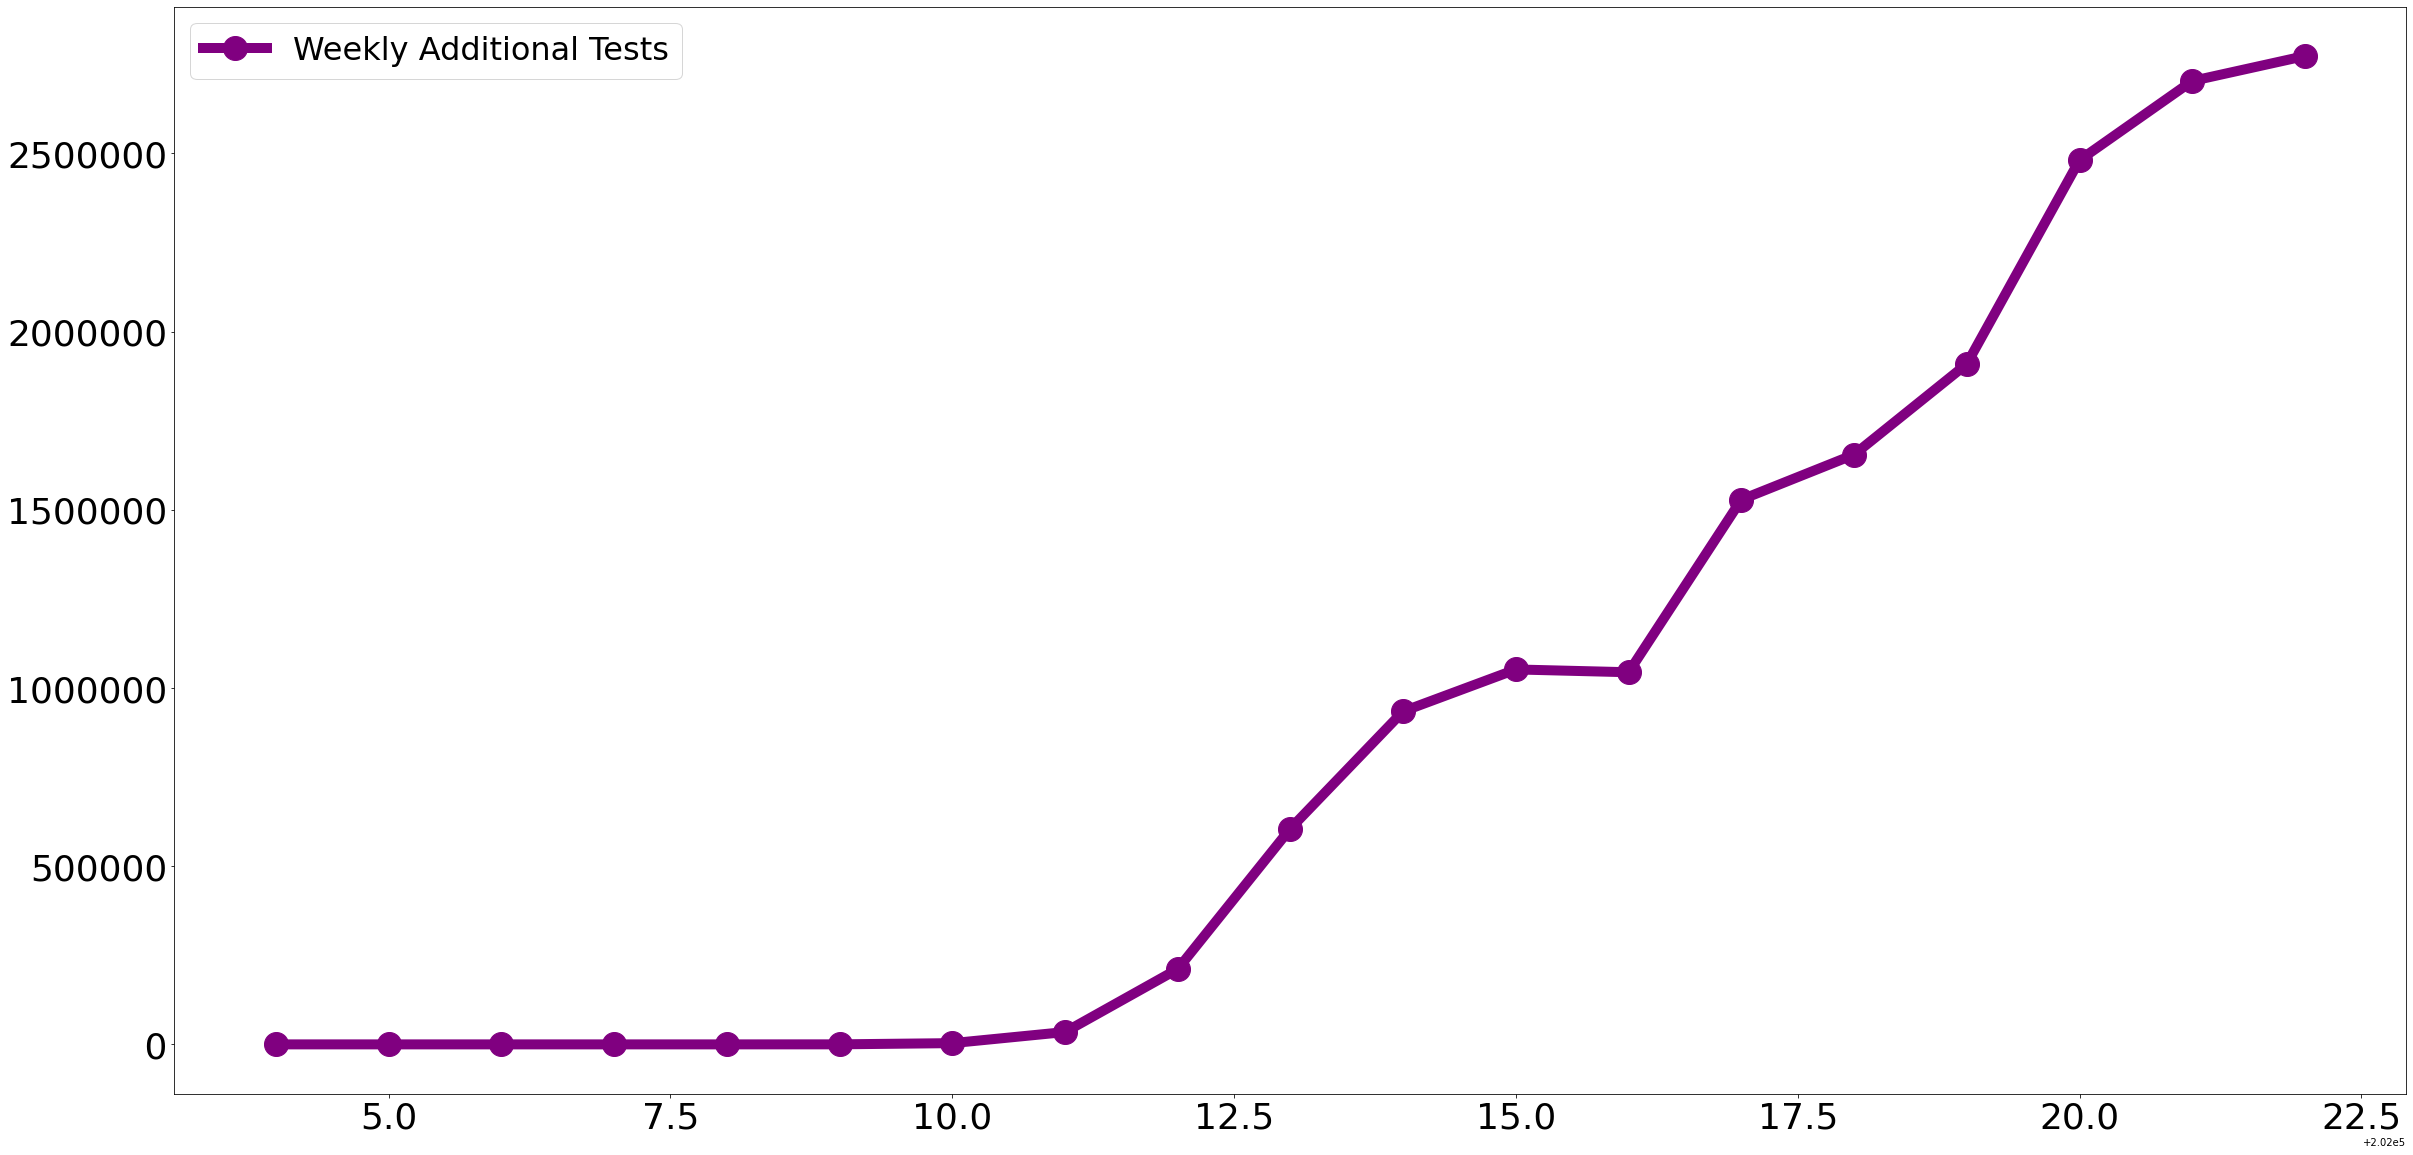

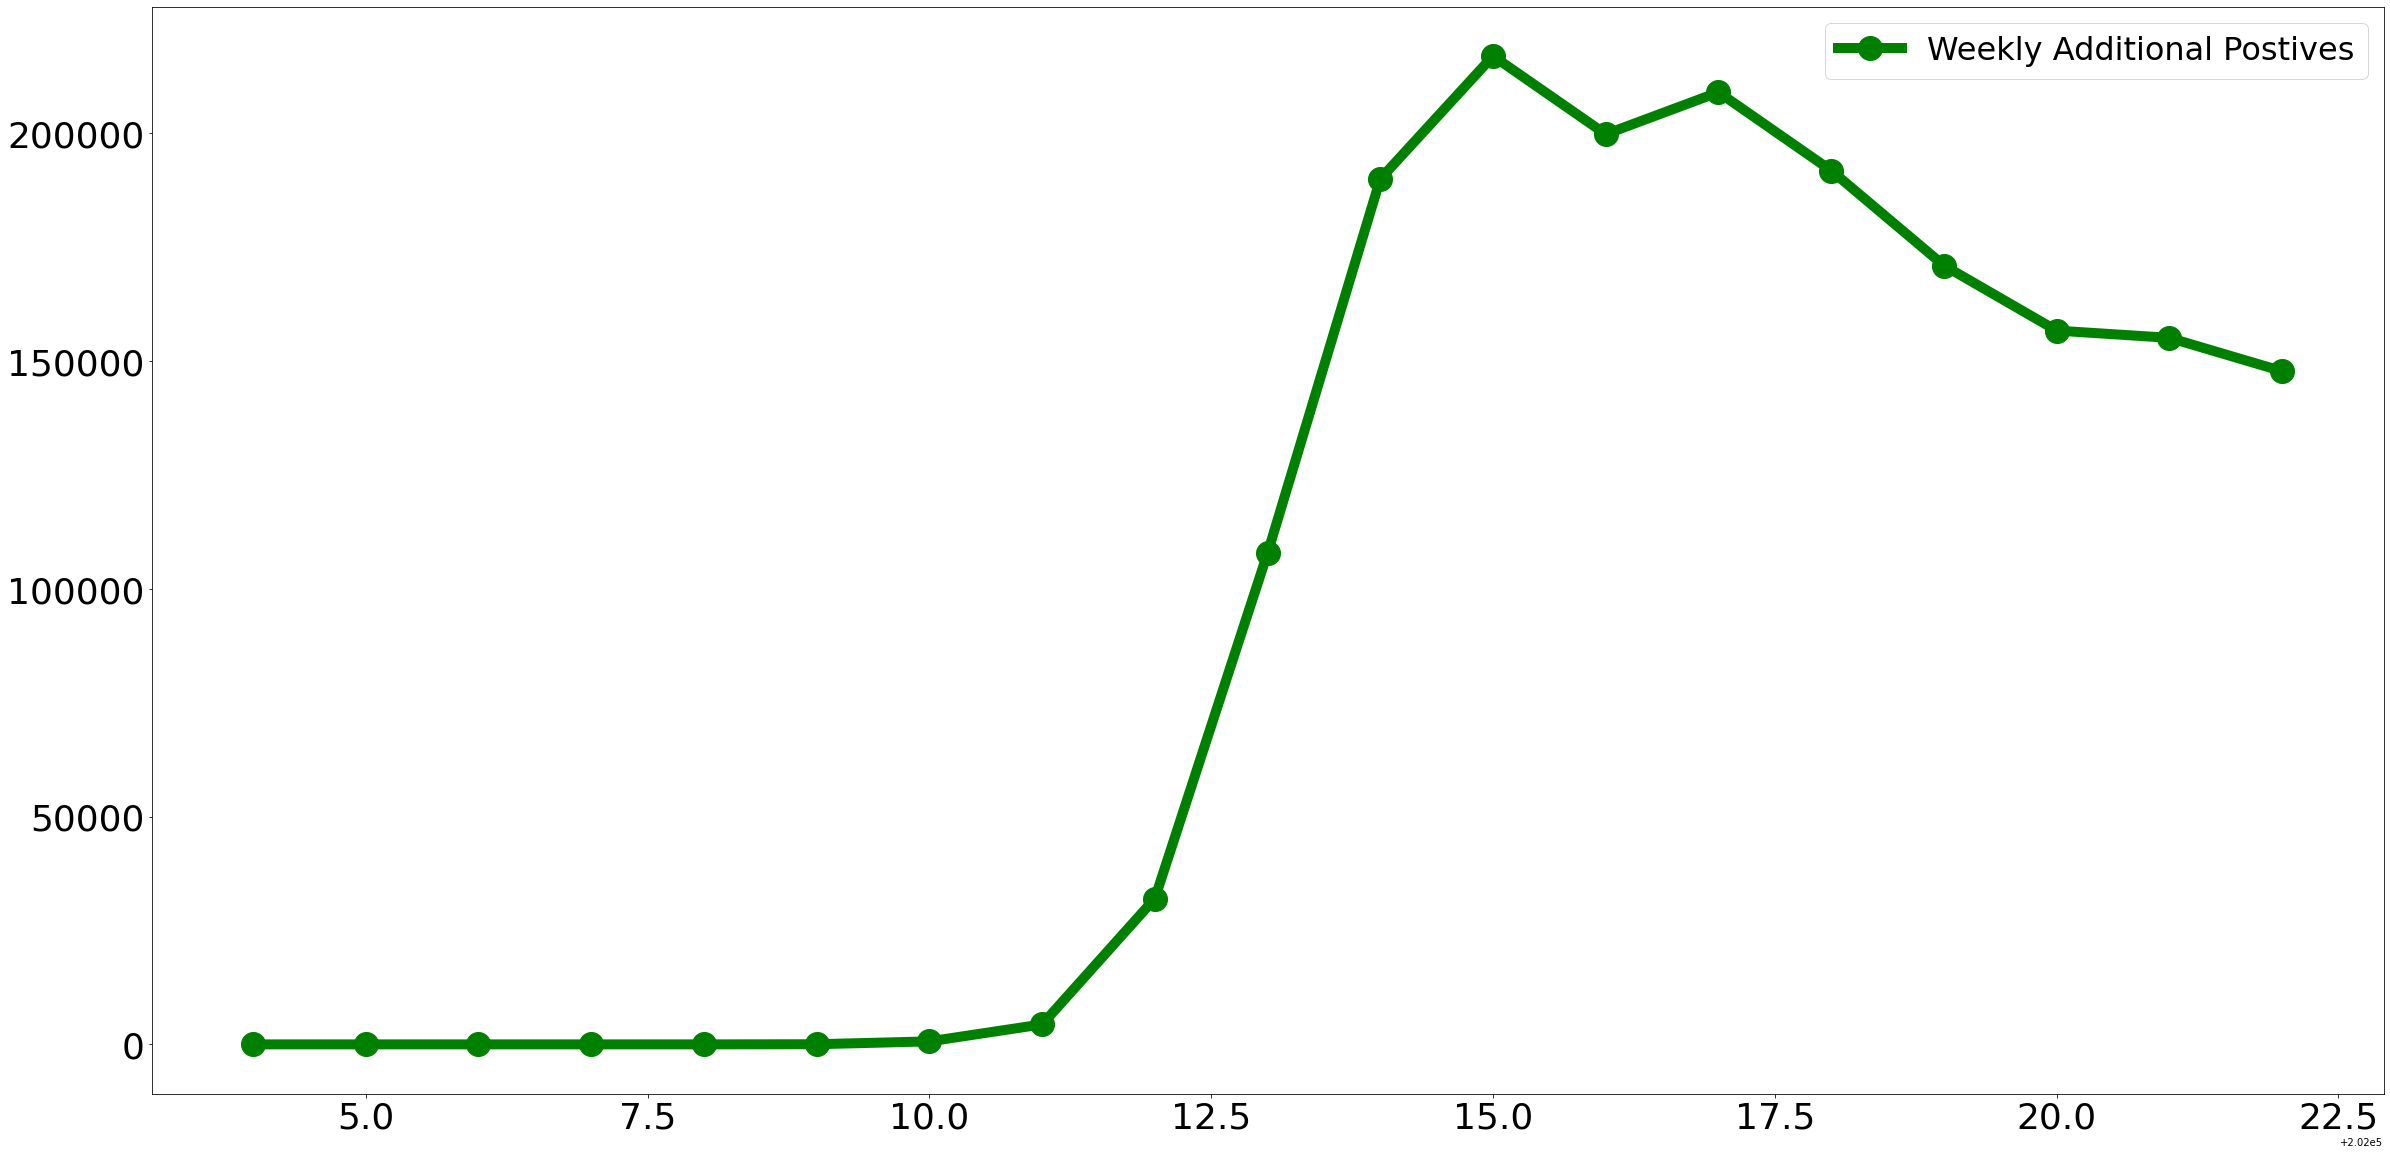

In [33]:
import matplotlib.ticker as ticker
plt1 = dfByWeekYear.sum()[:-1][['deathIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='red')
plt1.legend(['Weekly Additional Deaths'],fontsize=32)
plt2 = dfByWeekYear.sum()[:-1][['totalTestResultsIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='purple')
plt2.legend(['Weekly Additional Tests'],fontsize=32)

plt2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%6.0d'))
    
plt3 = dfByWeekYear.sum()[:-1][['positiveIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='green')
plt3.legend(['Weekly Additional Postives'],fontsize=32)

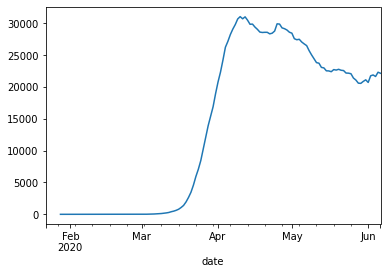

In [34]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().positiveIncrease.plot.line()

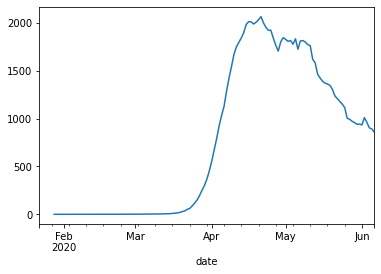

In [35]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().deathIncrease.plot.line()

In [0]:
dfCAAvg = dfCovidtracking[dfCovidtracking.state=='CA'] \
.groupby(by='date').sum().rolling(window=7).mean()

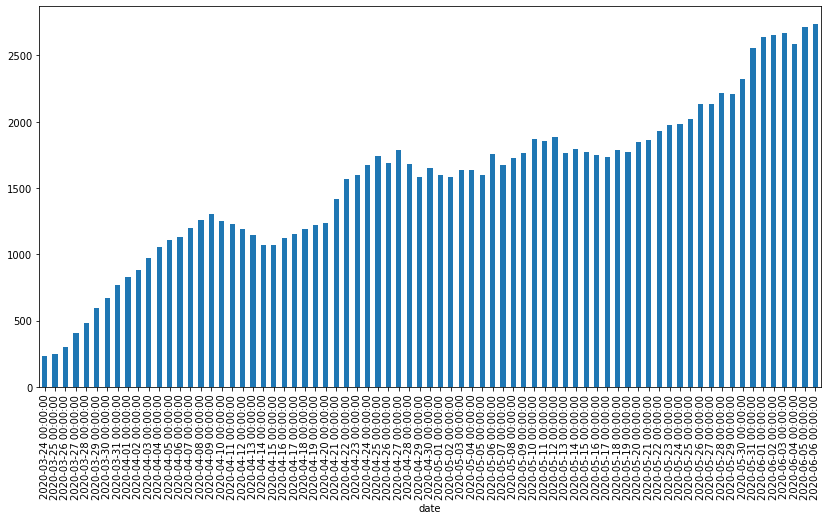

In [37]:

graph1 = dfCAAvg[20:].positiveIncrease.plot.bar(figsize=(14,7))


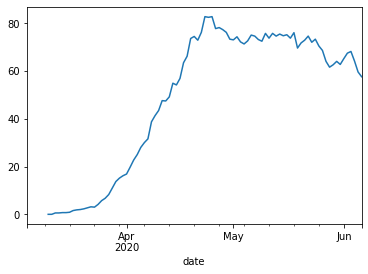

In [38]:
dfCAAvg.deathIncrease.plot.line()

In [39]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['AL']))].head(10)

,state,date,positive,death,total_positive,pct
93,AL,2020-06-06,20043,689,20043,1.000000
94,AL,2020-06-05,19387,676,20043,0.967270
95,AL,2020-06-04,19072,653,20043,0.951554
96,AL,2020-06-03,18851,653,20043,0.940528
97,AL,2020-06-02,18642,651,20043,0.930100
98,AL,2020-06-01,18363,646,20043,0.916180
99,AL,2020-05-31,17903,631,20043,0.893230
100,AL,2020-05-30,17359,618,20043,0.866088
101,AL,2020-05-29,16823,605,20043,0.839345
102,AL,2020-05-28,16310,590,20043,0.813750


In [40]:
datecutoff = dfDates.date.max()-datetime.timedelta(days=7)
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .85)].sort_values(by='pct')


,state,date,positive,death,total_positive,pct
3896,PR,2020-05-30,3718,133,4915,0.756460
368,AZ,2020-05-30,19255,903,25451,0.756552
192,AR,2020-05-30,7013,133,9101,0.770575
2770,NC,2020-05-30,27673,877,34625,0.799220
4453,UT,2020-05-30,9533,112,11798,0.808018
7,AK,2020-05-30,434,10,536,0.809701
1762,KY,2020-05-30,9464,418,11287,0.838487
2503,MP,2020-05-30,22,2,26,0.846154
4077,SC,2020-05-30,11394,487,13453,0.846949
4358,TX,2020-05-30,62338,1626,73553,0.847525


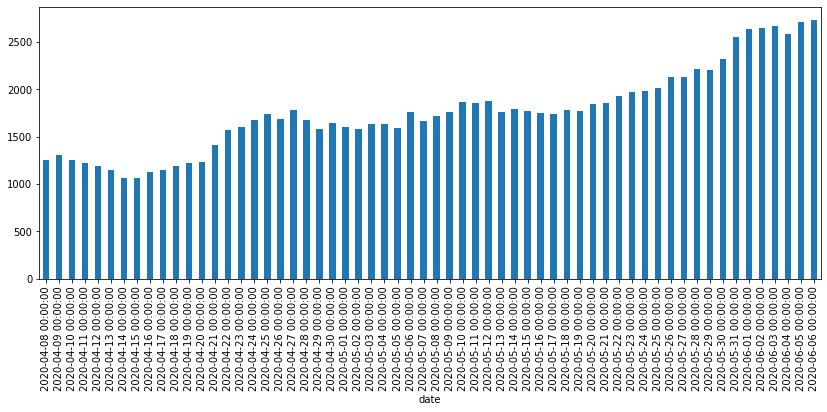

In [94]:

def showStateData(state):
  return dfCovidtracking[dfCovidtracking.state==state]\
  .sort_index()\
  .copy()



chart = showStateData('CA')\
.positiveIncrease\
.rolling(window=7)\
.mean()[-60:].plot.bar(figsize=(14,5))

In [42]:
dfTest = dfCovidtracking[dfCovidtracking.state=='CA'].sort_index().copy()
dfTest.head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,06,0,0,515,515,0,515,0,0,ae2b9d2e5d691c66d1abe7c43c3564e865279fd9,0,0,0,0,0,
2020-03-05,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,06,0,0,515,515,0,515,0,0,10c1ce97af2a37d316e43bb512b486d8c380ca37,0,0,0,0,0,
2020-03-06,CA,60,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,06,7,0,522,522,7,522,0,0,2790f2f9e9ab3cc94caca4b0a2c7d0ecb23ddcf6,0,0,0,0,0,
2020-03-07,CA,69,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,06,9,0,531,531,9,531,0,0,af5f339fc3168c1f9135ea735ef21475b35a8c01,0,0,0,0,0,
2020-03-08,CA,88,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,06,19,0,550,550,19,550,0,0,bcf5160531e8ce70a9a61aa770e6aa4e869161ef,0,0,0,0,0,


In [43]:
dfTest.head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,fips,positiveIncrease,negativeIncrease,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,06,0,0,515,515,0,515,0,0,ae2b9d2e5d691c66d1abe7c43c3564e865279fd9,0,0,0,0,0,
2020-03-05,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,06,0,0,515,515,0,515,0,0,10c1ce97af2a37d316e43bb512b486d8c380ca37,0,0,0,0,0,
2020-03-06,CA,60,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,06,7,0,522,522,7,522,0,0,2790f2f9e9ab3cc94caca4b0a2c7d0ecb23ddcf6,0,0,0,0,0,
2020-03-07,CA,69,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,06,9,0,531,531,9,531,0,0,af5f339fc3168c1f9135ea735ef21475b35a8c01,0,0,0,0,0,
2020-03-08,CA,88,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,06,19,0,550,550,19,550,0,0,bcf5160531e8ce70a9a61aa770e6aa4e869161ef,0,0,0,0,0,


# State Population Data


In [0]:
data_url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv"


In [0]:
dfUSPop = pd.read_csv(data_url)

In [46]:
import math
us_pop = dfUSPop.loc[0].POPESTIMATE2019 #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.index.max()][['positive', 'negative', 'pending','death', 'total']].sum()
cir = res.positive/res.total
cfr = res.death/res.positive
p_aff= math.ceil(us_pop*cir)
p_dead= math.ceil(p_aff*cfr)
print(res)
print(f"Current Infection Rate {cir*100:2f}%")
print(f"Percentage of US affected: {(res.positive+res.death)/us_pop*100:2f}%")
print(f"Observed CFR: {cfr*100:2f}%")
print(f"Percentage of US tested/affected: {(res.negative+res.positive+res.death)/us_pop*100:2f}%")
print(f"Projected affected by cir = {p_aff:,d}")
print(f"Projected killed = {p_dead:,d}")


positive     1916053
negative    17862820
pending         1796
death         103947
total       19780669
dtype: int64
Current Infection Rate 9.686492%
Percentage of US affected: 0.615404%
Observed CFR: 5.425059%
Percentage of US tested/affected: 6.057412%
Projected affected by cir = 31,794,897
Projected killed = 1,724,892


In [0]:
!if [ ! -d "loc" ]; then \
git clone https://gist.github.com/rogerallen/1583593 --depth=1 --quiet loc; \
fi
import sys
sys.path.append("loc")




In [0]:
import us_state_abbrev as us_abbr


In [0]:
dfStatePop = dfUSPop[dfUSPop.STATE != 0].copy()

In [0]:
dfStatePop['ABBR']=dfStatePop.NAME.apply(lambda x: us_abbr.us_state_abbrev[x])

In [0]:
dfStatePop = dfStatePop.loc[:, ['ABBR', 'POPESTIMATE2019']]
dfStatePop.set_index('ABBR', inplace=True)

In [0]:
dfStateCovid = dfCovidtracking.loc[dfCovidtracking.index.max()].set_index('state')

In [0]:
dfStateJoin = dfStateCovid.join(dfStatePop)

In [54]:
pd.DataFrame([(dfStateJoin.positive / dfStateJoin.POPESTIMATE2019)*100, \
              (dfStateJoin.totalTestResults/ dfStateJoin.POPESTIMATE2019)*100],\
             index=['state_pos_pop','state_test_pop'] ).T.sort_values(by="state_pos_pop", ascending=False)[:51]

,state_pos_pop,state_test_pop
state,,
NY,1.939573,12.529362
NJ,1.845187,10.351591
MA,1.496292,9.352756
RI,1.457577,16.117169
DC,1.313356,7.605820
CT,1.229017,8.289627
DE,1.011025,6.945728
IL,1.001356,8.065723
MD,0.950795,5.911262


In [55]:
#print(f"Current Infection Rate {res.positive/res.total*100:2f}%")

print(f"Current Testing Percent {gbUSA.sum().tail(1).totalTestResults[0]/dfUSPop[dfUSPop.REGION=='0'].POPESTIMATE2019[0]*100:2f}%")

Current Testing Percent 6.025744%


In [56]:
dfJHUData.columns

Index(['FIPS', 'city', 'state', 'country', 'last_update', 'lat', 'lon',
       'confirmed', 'dead', 'recovered', 'active', 'key'],
      dtype='object')

# OWID Data

In [0]:
dfOwid = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [58]:
dfOwid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22242 entries, 0 to 22241
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         22178 non-null  object 
 1   continent                        22019 non-null  object 
 2   location                         22242 non-null  object 
 3   date                             22242 non-null  object 
 4   total_cases                      22242 non-null  int64  
 5   new_cases                        22242 non-null  int64  
 6   total_deaths                     22242 non-null  int64  
 7   new_deaths                       22242 non-null  int64  
 8   total_cases_per_million          21851 non-null  float64
 9   new_cases_per_million            21851 non-null  float64
 10  total_deaths_per_million         21851 non-null  float64
 11  new_deaths_per_million           21851 non-null  float64
 12  total_tests       

In [0]:
dfOwidTests = dfOwid.dropna(subset=['total_tests']).copy()

In [0]:
dfOwidLatest = dfOwidTests.sort_values(by='date').groupby('iso_code').last()

In [61]:
dfOwidLatest.total_tests.sort_values(ascending=False)

iso_code
USA    19811243.0
RUS    12053663.0
IND     4386379.0
DEU     4348880.0
ITA     4049544.0
          ...    
BOL       33946.0
MMR       31701.0
MDV       26243.0
CRI       20498.0
ZWE       20012.0
Name: total_tests, Length: 84, dtype: float64

In [62]:
isUSA = dfOwidLatest.index.isin(['USA'])
NonUSTests = dfOwidLatest[~isUSA].total_tests.sum()
USTests = dfOwidLatest[isUSA].total_tests.sum()

print(f"Total testing done outside of USA: {NonUSTests:.0f}")
print(f"Total tests done in USA : {USTests:.0f}")
print(f"How many more times has the world tested more than the US: {NonUSTests/USTests:.1f}")

Total testing done outside of USA: 58679499
Total tests done in USA : 19811243
How many more times has the world tested more than the US: 3.0


In [63]:
dfOwidLatest[isUSA].sum()

continent                            North America
location                             United States
date                                    2020-06-04
total_cases                                1851520
new_cases                                    19699
total_deaths                                107175
new_deaths                                     994
total_cases_per_million                    5593.67
new_cases_per_million                       59.513
total_deaths_per_million                   323.789
new_deaths_per_million                       3.003
total_tests                            1.98112e+07
new_tests                                   428963
total_tests_per_thousand                    59.852
new_tests_per_thousand                       1.296
new_tests_smoothed                          504442
new_tests_smoothed_per_thousand              1.524
tests_units                        tests performed
stringency_index                             72.69
population                     

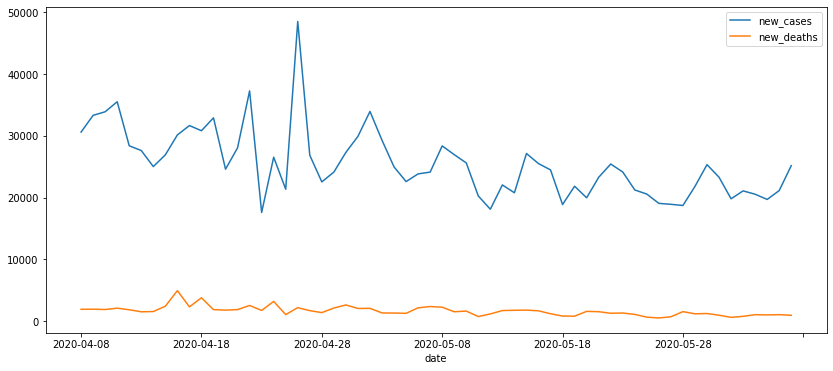

In [64]:
dfOwidUSA = dfOwid.loc[dfOwid.iso_code=='USA']

dfOwidUSA.set_index('date')[['new_cases','new_deaths']][-60:].plot.line(figsize=(14,6))

In [0]:
state = 'FL'
dfRollingWeekState = dfCovidtracking.loc[dfCovidtracking.state==state]\
.rolling(window=7).mean()


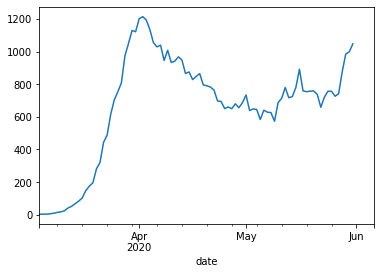

In [92]:
plt = dfRollingWeekState.positiveIncrease.plot.line()

In [67]:
dfJHUData[dfJHUData.state=='Florida'].confirmed.sum()

61488

In [0]:
doWGA = dfCovidtracking[dfCovidtracking.state=='GA'][['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']]\
.groupby(lambda x: x.dayofweek)

In [69]:
doWGA.sum()

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,318,1076,76553,5815,82368
1,466,1723,66032,8118,74150
2,371,1851,-11209,8635,-2574
3,349,1268,63977,7418,71395
4,336,1313,91942,8972,100914
5,203,1111,95506,6654,102160
6,131,320,88747,5695,94442


# Socrata (San Francisco) Data

In [70]:
!pip install sodapy

In [0]:
from sodapy import Socrata

In [0]:
client = Socrata("data.sfgov.org", "LCSuN5PrqWkGtBe9dULkS75Rz")
results_df = pd.DataFrame.from_records(client.get("tvq9-ec9w"))

In [73]:
results_df.case_disposition.unique()

array(['Confirmed', 'Death'], dtype=object)

In [0]:
res = results_df.astype({'case_count':'int16'})

In [0]:
dfresConf = res[res.case_disposition=='Confirmed']
dfresDead = res[res.case_disposition=='Death']

In [0]:
dfTotals = dfresConf.groupby(by='date').sum().join(dfresDead.groupby(by='date').sum(), \
        rsuffix='dead').fillna(0) \
        .rename(columns={'case_count':'positive', 'case_countdead':'dead'})

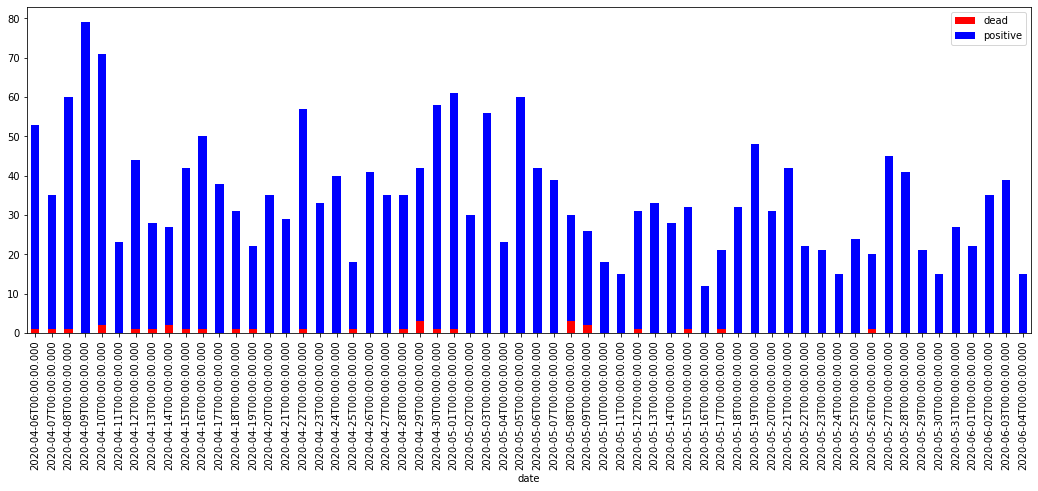

In [77]:
chart = dfTotals[['dead', 'positive']][-60:]\
.plot.bar(figsize=(18,6),stacked=True, color=['red','blue'])

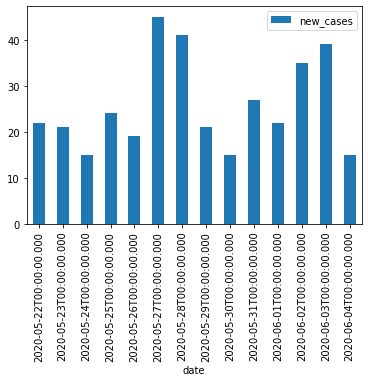

In [78]:
dfresConf.groupby('date').sum().rename(columns={'case_count':'new_cases'}).tail(14).plot.bar()

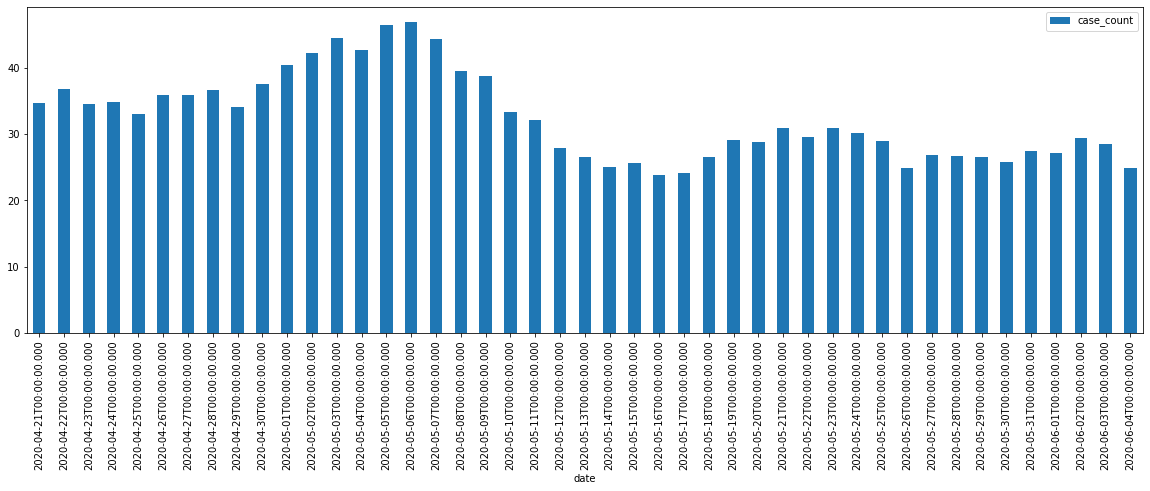

In [79]:
dfresConf.groupby('date').sum().rolling(window=7).mean()[-45:].plot.bar(figsize=(20,6))

# Marin Data

In [0]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRmO2pStf7Ft1yYjDULluZXzUAczGK_B34hDemDBadGEY0HTLwlcadF2cHNEwmmvLetUTf-D2ruYCT/pub?gid=0&single=true&output=csv"

df = pd.read_csv(url, header=1, parse_dates=[0], usecols=[0,1,3,5,6,7], index_col=[0])

In [81]:
df.tail()

,positive,deaths,tested,hospitalizations,Recovered
date,,,,,
2020-06-02,506,17.0,13791.0,52.0,340.0
2020-06-03,525,17.0,14430.0,52.0,366.0
2020-06-04,530,17.0,14592.0,52.0,392.0
2020-06-05,551,17.0,15034.0,52.0,401.0
2020-06-06,571,17.0,15573.0,52.0,405.0


In [82]:
df[['deaths','positive']].diff()

,deaths,positive
date,,
2020-03-06,NaN,NaN
2020-03-07,0.0,0.0
2020-03-08,0.0,1.0
2020-03-09,0.0,0.0
2020-03-10,NaN,0.0
...,...,...
2020-06-02,2.0,5.0
2020-06-03,0.0,19.0
2020-06-04,0.0,5.0


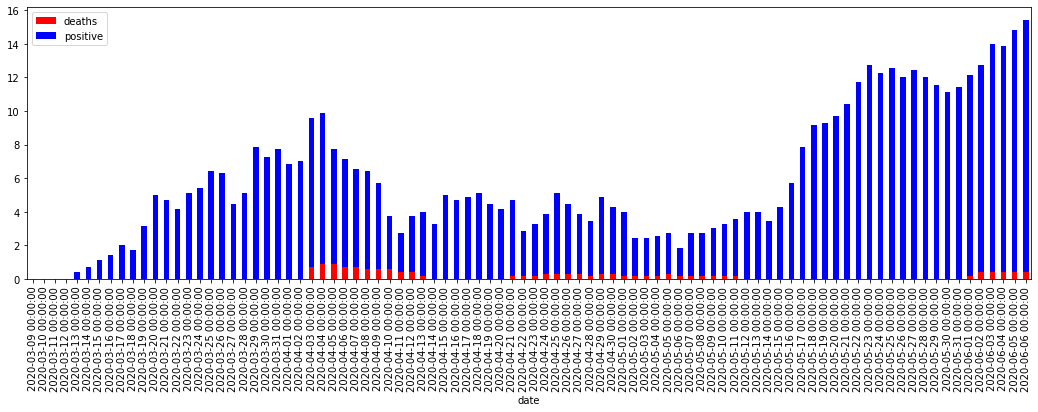

In [83]:
chart= df[['deaths','positive']].diff()\
.rolling(window=7).mean()[-90:]\
.plot.bar(stacked=True,figsize=(18,5), color=['r','b'])

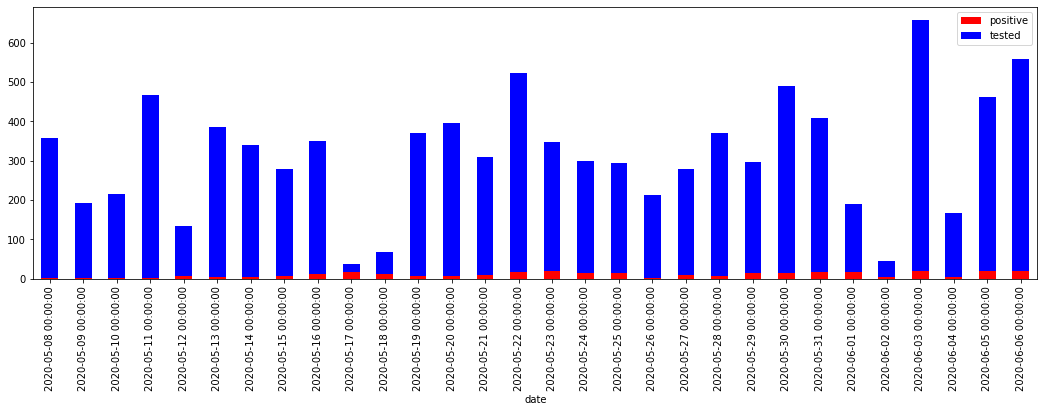

In [84]:
chart= df[['positive','tested']].diff()[-30:]\
.plot.bar(stacked=True,figsize=(18,5), color=['r','b'])

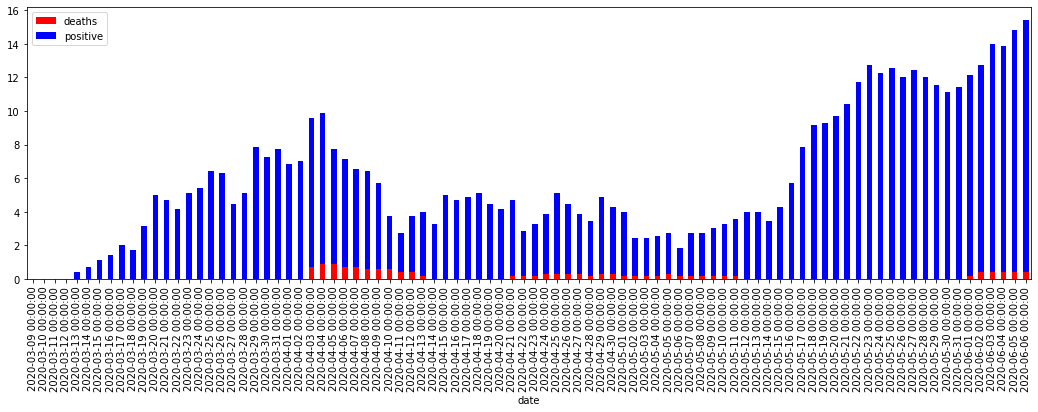

In [85]:
chart= df[['deaths','positive']].diff()\
.rolling(window=7).mean()[-90:]\
.plot.bar(stacked=True,figsize=(18,5), color=['r','b'])

In [86]:
marin_pop = 259725

print(f"Marin Population Positive: {(df[-1:].positive.values[0]/marin_pop)*100:2.2f}%")
print(f"Marin Population Tested: {(df[-1:].tested.values[0]/marin_pop)*100:2.2f}%")

Marin Population Positive: 0.22%
Marin Population Tested: 6.00%


In [87]:
df.positive.diff().rolling(window=7).mean().tail()

date
2020-06-02    12.285714
2020-06-03    13.571429
2020-06-04    13.428571
2020-06-05    14.428571
2020-06-06    15.000000
Name: positive, dtype: float64

In [88]:
dfCovidtracking[dfCovidtracking.state=='CA'].head(28)[::-1].positive.diff()


date
2020-05-10       NaN
2020-05-11    1259.0
2020-05-12    1443.0
2020-05-13    1759.0
2020-05-14    2023.0
2020-05-15    1772.0
2020-05-16    1857.0
2020-05-17    2046.0
2020-05-18    1591.0
2020-05-19    1365.0
2020-05-20    2262.0
2020-05-21    2140.0
2020-05-22    2247.0
2020-05-23    2187.0
2020-05-24    2079.0
2020-05-25    1848.0
2020-05-26    2175.0
2020-05-27    2247.0
2020-05-28    2717.0
2020-05-29    2189.0
2020-05-30    2992.0
2020-05-31    3705.0
2020-06-01    2423.0
2020-06-02    2304.0
2020-06-03    2377.0
2020-06-04    2120.0
2020-06-05    3094.0
2020-06-06    3115.0
Name: positive, dtype: float64